<a href="https://colab.research.google.com/github/GayanPriyadarshana/Data-Analysis-Project-on-Uber/blob/main/ProjectUber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
files = os.listdir(r'/content/gdrive/MyDrive/Project 1..Uber New York Trip/uber-pickups-in-new-york-city')[-7:]
files

['uber-raw-data-aug14.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [ ]:
files.remove('uber-raw-data-janjune-15.csv')

In [ ]:
path = r'/content/gdrive/MyDrive/Project 1..Uber New York Trip/uber-pickups-in-new-york-city'

final = pd.DataFrame()

for file in files:
  df = pd.read_csv(path+'/'+file, encoding='utf=8')
  final = pd.concat([df,final])


In [ ]:
df = final.copy() 

In [ ]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [ ]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format= '%m/%d/%Y %H:%M:%S')

In [ ]:
df['weekday'] = df['Date/Time'].dt.day_name()
df['month'] = df['Date/Time'].dt.month
df['day'] = df['Date/Time'].dt.day
df['minute'] = df['Date/Time'].dt.minute
df['hour'] = df['Date/Time'].dt.hour

In [ ]:
df['weekday'].value_counts().index
df['weekday'].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: weekday, dtype: int64

In [ ]:
px.bar(x =df['weekday'].value_counts().index,
       y=df['weekday'].value_counts() )

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

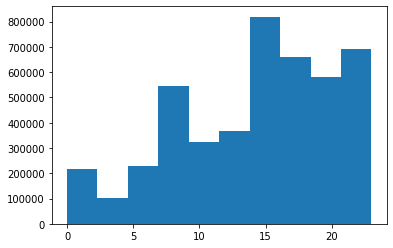

In [ ]:
plt.hist(df['hour'])

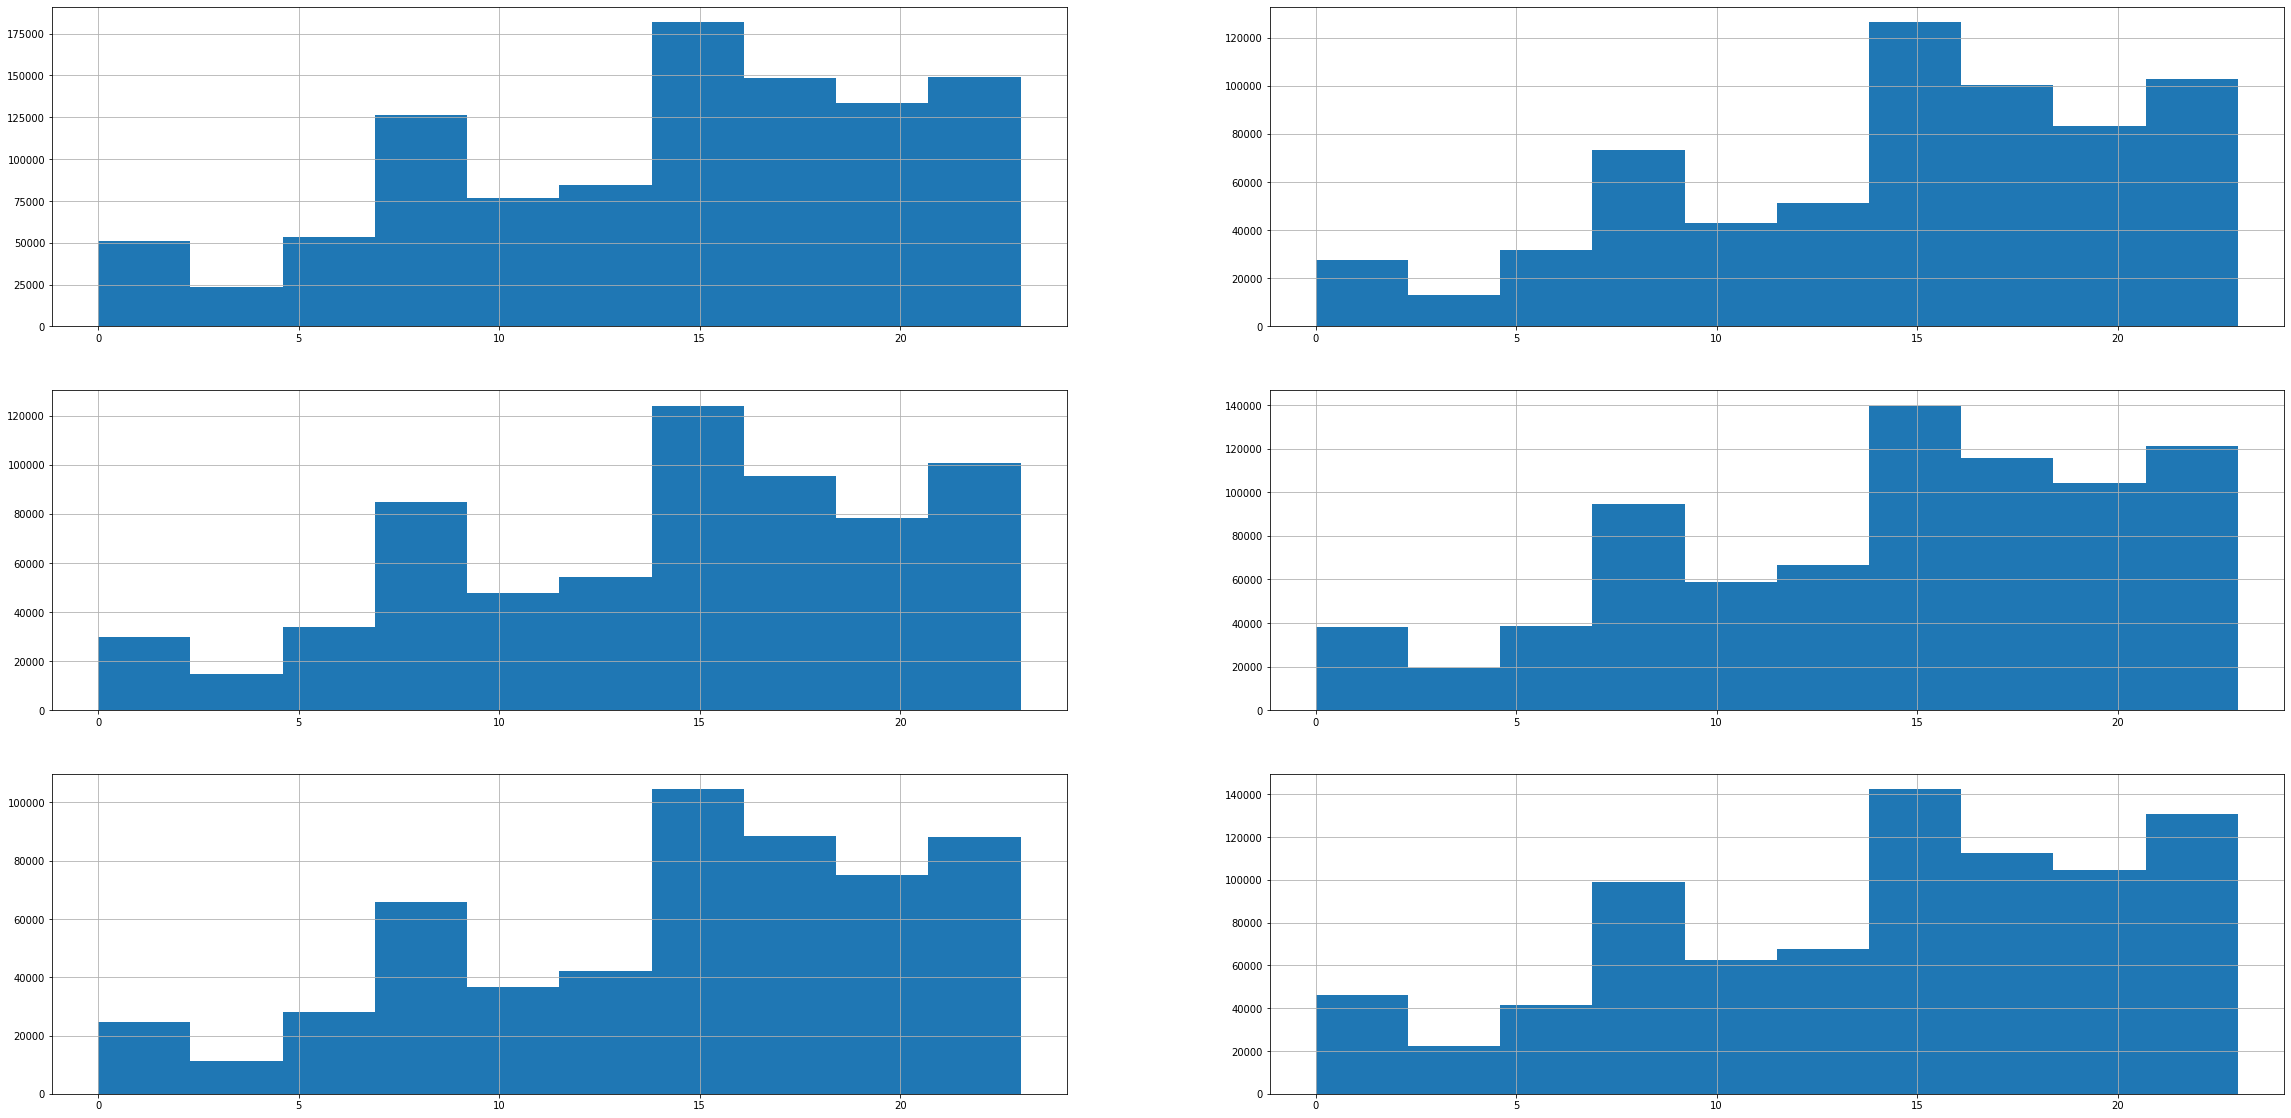

In [ ]:
plt.figure(figsize=(40,20))

for i, month in enumerate(df['month'].unique()):
  plt.subplot(3,2,i+1)
  df[df['month']==month]['hour'].hist() 

In [ ]:
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

     |████████████████████████████████| 64 kB 1.9 MB/s 


In [ ]:
df.groupby('month')['month'].count()

month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: month, dtype: int64

In [ ]:
px.bar(x =df.groupby('month')['month'].count().index,
       y=df.groupby('month')['month'].count() )

In [ ]:
trace1 = go.Bar(
    x =df.groupby('month')['hour'].count().index,
    y=df.groupby('month')['hour'].count()
)

In [ ]:
iplot([trace1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



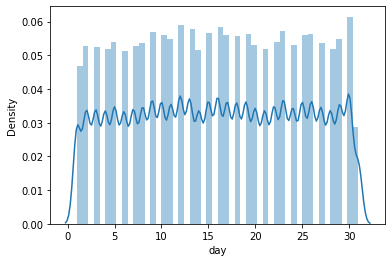

In [ ]:
sns.distplot(df['day'])

Text(0.5, 1.0, 'Journies by day')

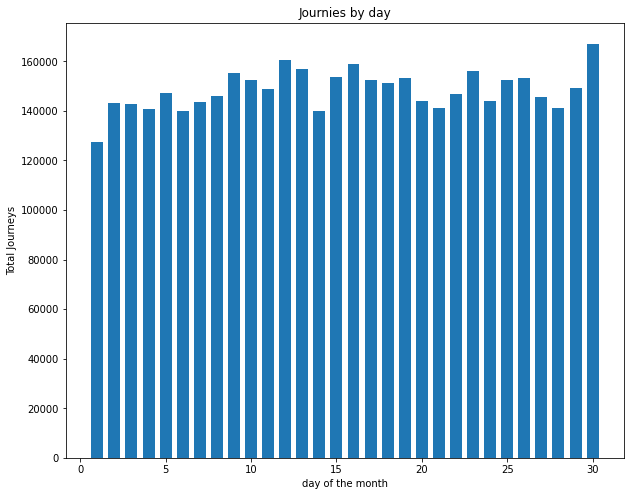

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(df['day'], bins=30, rwidth=.7, range = (0.5,30.5))
plt.xlabel('day of the month')
plt.ylabel('Total Journeys')
plt.title('Journies by day')


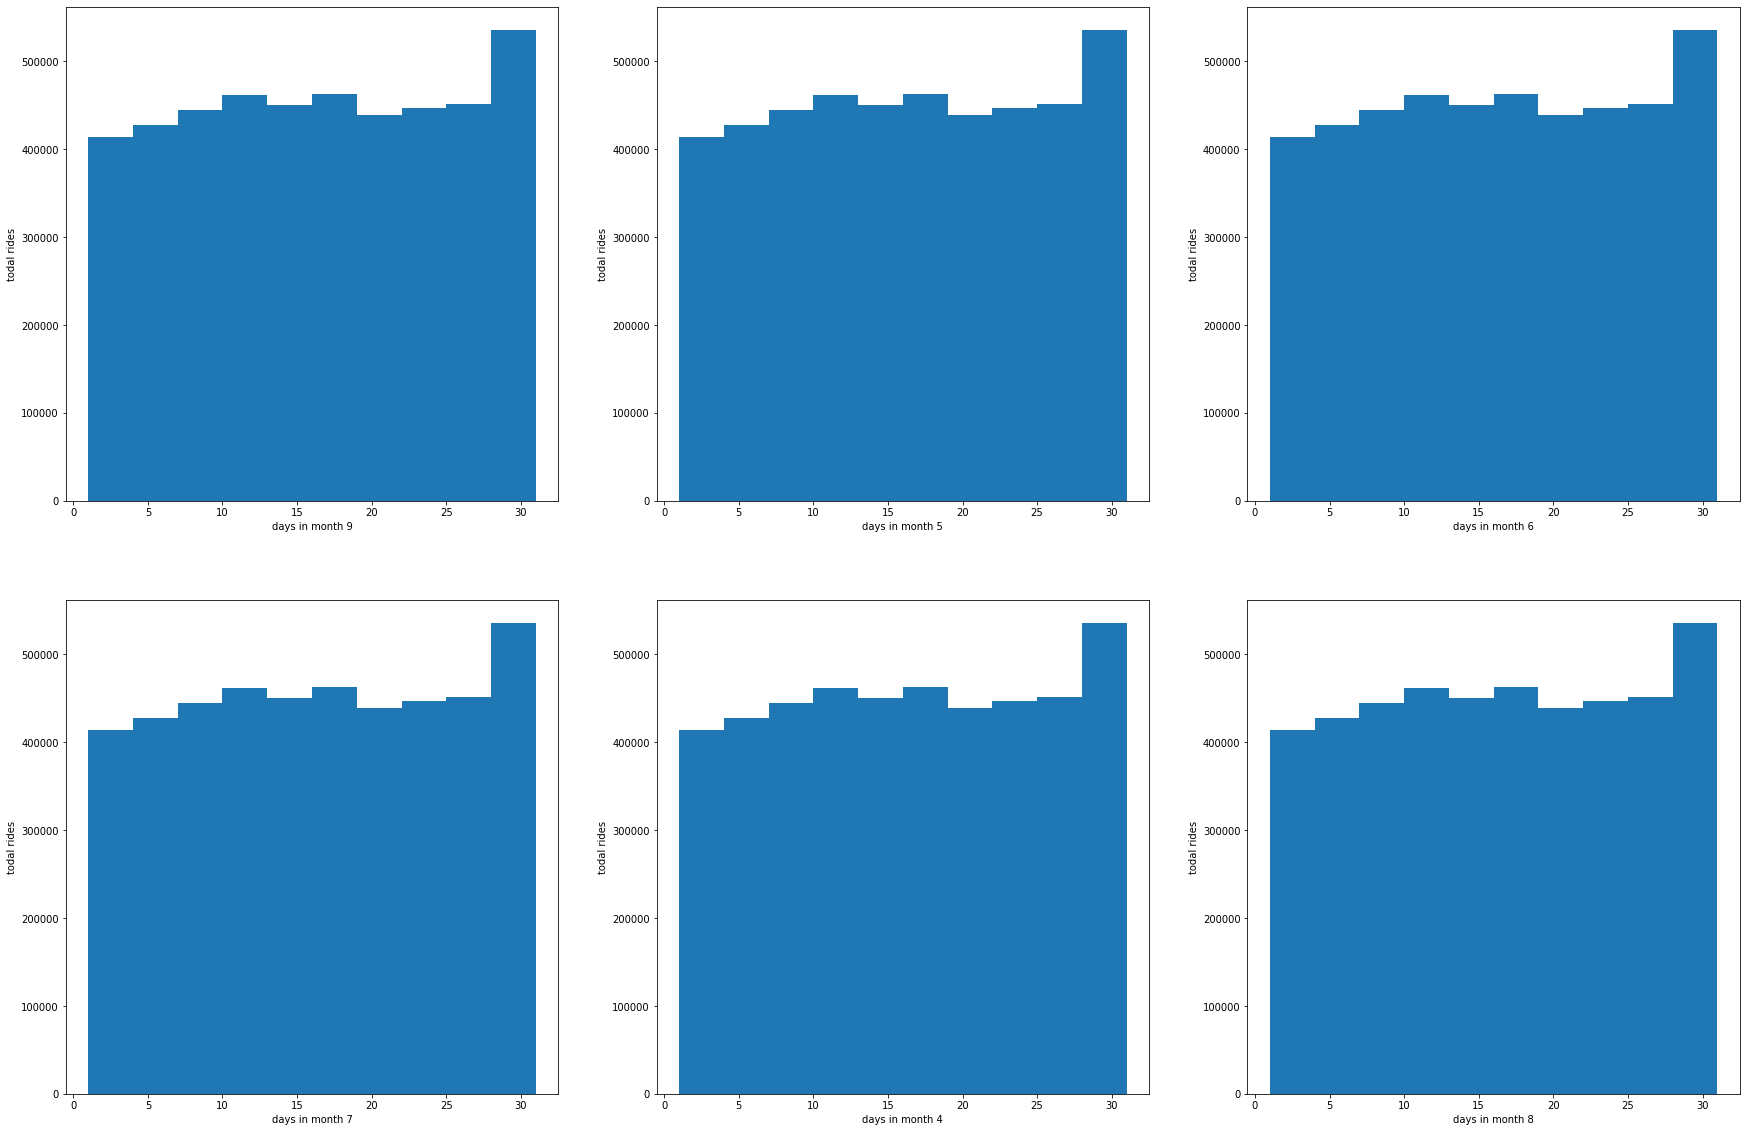

In [ ]:
plt.figure(figsize=(30,20))

for index, month in enumerate(df['month'].unique(),1):
  plt.subplot(2,3,index)
  df_out = df[df['month']== month]
  plt.hist(df['day'])
  plt.xlabel('days in month {}'.format(month))
  plt.ylabel('todal rides')

Text(0.5, 1.0, 'hoursoffday vs latitude of passengers')

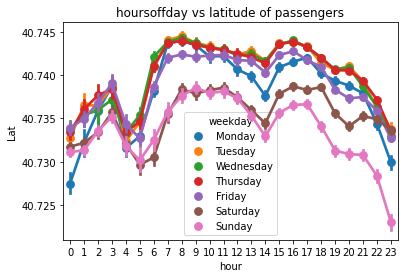

In [ ]:
ax = sns.pointplot(x='hour', y='Lat', data=df, hue='weekday')
ax.set_title('hoursoffday vs latitude of passengers')

In [ ]:
base = df.groupby(['Base', 'month'])['Date/Time'].count().reset_index()
base

,Base,month,Date/Time
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472
5,B02512,9,34370
6,B02598,4,183263
7,B02598,5,260549
8,B02598,6,242975
9,B02598,7,245597


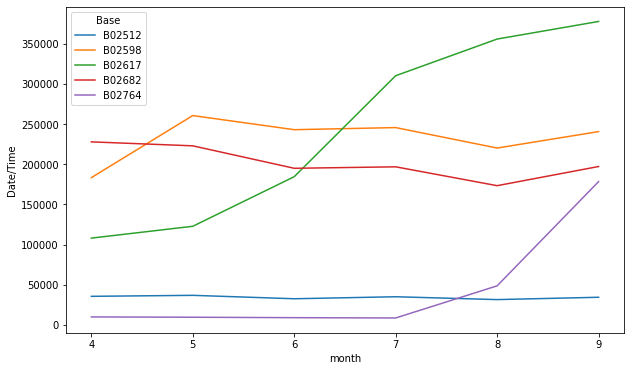

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='month', y='Date/Time', hue='Base', data=base)

In [ ]:
by_cross = df.groupby(['weekday', 'hour'])['Date/Time'].count()
by_cross

weekday    hour
Friday     0       13716
           1        8163
           2        5350
           3        6930
           4        8806
                   ...  
Wednesday  19      47017
           20      47772
           21      44553
           22      32868
           23      18146
Name: Date/Time, Length: 168, dtype: int64

In [ ]:
pivot = by_cross.unstack()
pivot


hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,24176,25188,25907,30341,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,20288,20333,20488,23385,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,20596,22718,24298,26636,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,19839,22856,23911,26417,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,25877,25966,26465,30840,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,23676,23679,23850,29075,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,24696,24963,25533,29183,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


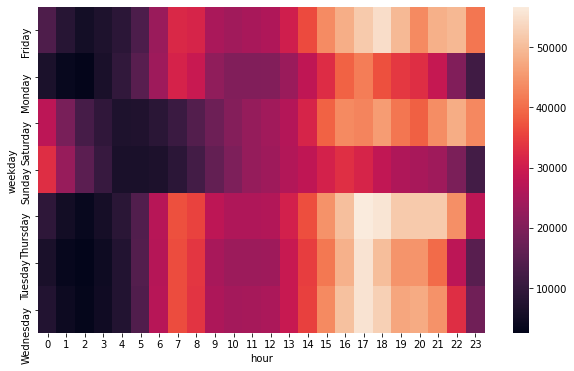

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot)

In [ ]:
def heatmap(col1, col2):
  by_cross = df.groupby([col1, col2])['Date/Time'].count()
  pivot = by_cross.unstack()
  plt.figure(figsize=(10,6))
  sns.heatmap(pivot)


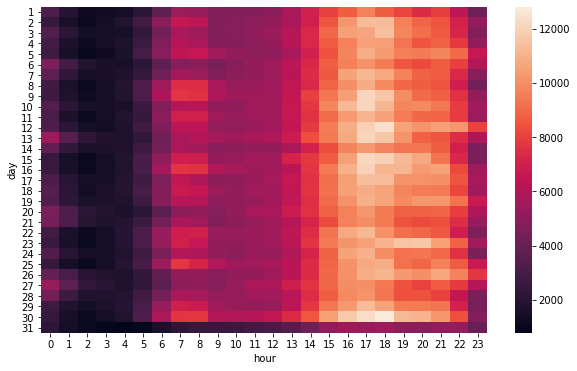

In [ ]:
heatmap('day', 'hour')

(40.6, 41.0)

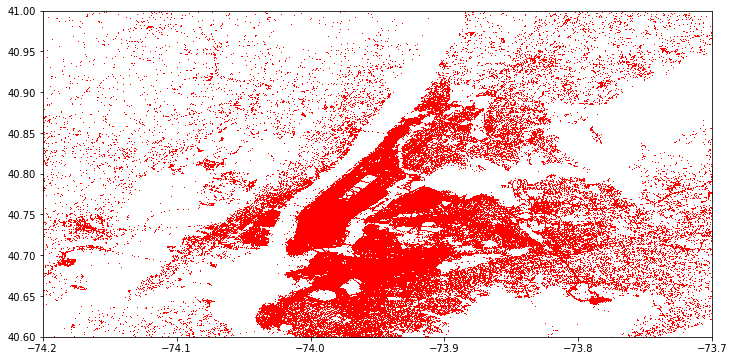

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Lon'], df['Lat'], 'r+', ms=0.5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.6, 41)

In [ ]:
df_out = df[df['weekday']=='Sunday']

In [ ]:
df_out.shape

(490180, 9)

In [ ]:
rush = df_out.groupby(['Lat','Lon'])['weekday'].count().reset_index()
rush

,Lat,Lon,weekday
0,39.9374,-74.0722,1
1,39.9378,-74.0721,1
2,39.9384,-74.0742,1
3,39.9385,-74.0734,1
4,39.9415,-74.0736,1
...,...,...,...
209225,41.3141,-74.1249,1
209226,41.3180,-74.1298,1
209227,41.3195,-73.6905,1
209228,41.3197,-73.6903,1


In [ ]:
rush.columns = ['Latitude', 'Longtitude', 'noOfTrips']
rush

,Latitude,Longtitude,noOfTrips
0,39.9374,-74.0722,1
1,39.9378,-74.0721,1
2,39.9384,-74.0742,1
3,39.9385,-74.0734,1
4,39.9415,-74.0736,1
...,...,...,...
209225,41.3141,-74.1249,1
209226,41.3180,-74.1298,1
209227,41.3195,-73.6905,1
209228,41.3197,-73.6903,1


In [ ]:
!pip install folium
from folium.plugins import HeatMap
import folium

In [ ]:
basemap = folium.Map()

In [ ]:
#HeatMap(rush, max_zoom=20, radius=15).add_to(basemap)
#basemap

In [ ]:
uber_15 = pd.read_csv('/content/gdrive/MyDrive/Project 1..Uber New York Trip/uber-pickups-in-new-york-city/uber-raw-data-janjune-15.csv')

In [ ]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [ ]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [ ]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'],format='%Y/%m/%d %H:%M:%S')

In [ ]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [ ]:
uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['minute'] = uber_15['Pickup_date'].dt.minute
uber_15['month'] = uber_15['Pickup_date'].dt.month
uber_15['hour'] = uber_15['Pickup_date'].dt.hour

In [ ]:
uber_15.shape

(14270479, 9)

In [ ]:
px.bar(x = uber_15['month'].value_counts().index,
        y = uber_15['month'].value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



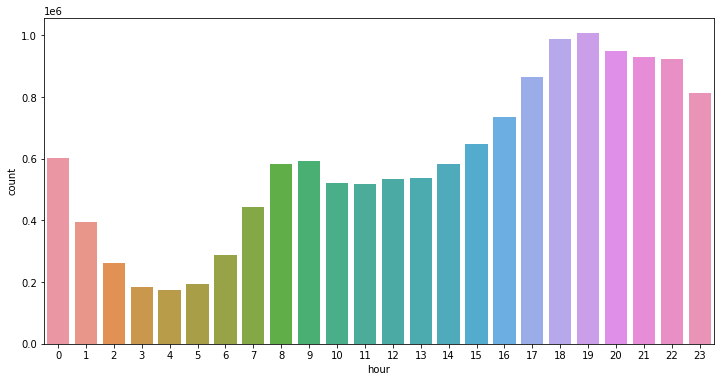

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(uber_15['hour'])

In [ ]:
summary = uber_15.groupby(['weekday', 'hour'])['Pickup_date'].count().reset_index()

summary.head()

,weekday,hour,Pickup_date
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575


In [ ]:
summary.columns = ['weekday', 'hour', 'counts']

summary

,weekday,hour,counts
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575
...,...,...,...
163,Wednesday,19,143751
164,Wednesday,20,136003
165,Wednesday,21,133993
166,Wednesday,22,127026


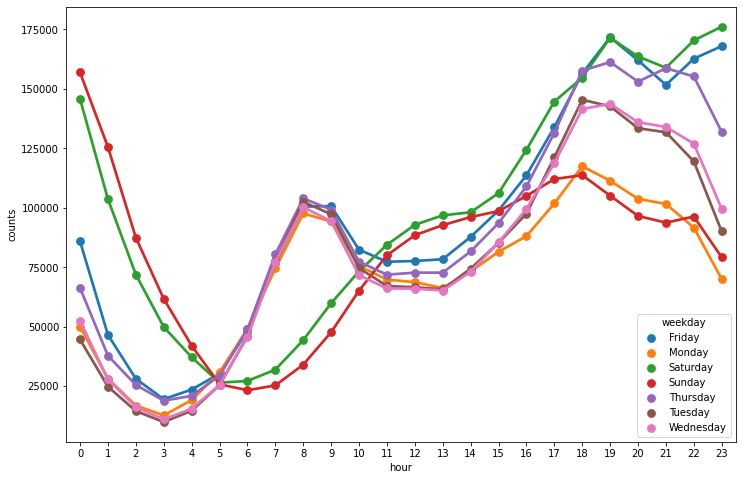

In [ ]:
plt.figure(figsize=(12,8))
sns.pointplot(x = 'hour', y = 'counts', hue = 'weekday', data = summary)

In [ ]:
uber_foil = pd.read_csv("/content/gdrive/MyDrive/Project 1..Uber New York Trip/uber-pickups-in-new-york-city/Uber-Jan-Feb-FOIL.csv")
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [ ]:
uber_foil['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

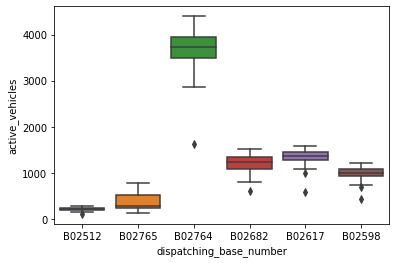

In [ ]:
sns.boxplot(x = 'dispatching_base_number',
            y = 'active_vehicles',
            data = uber_foil)

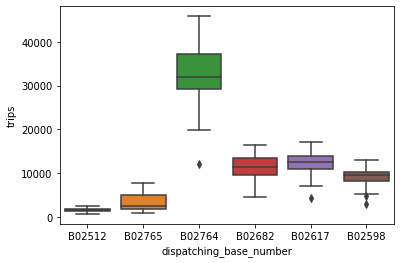

In [ ]:
sns.boxplot(x = 'dispatching_base_number',
            y = 'trips',
            data = uber_foil)

In [ ]:
uber_foil['trips/vehicle'] = uber_foil['trips']/uber_foil['active_vehicles']

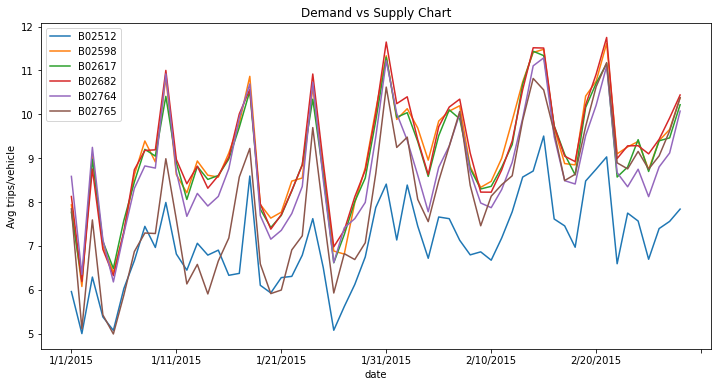

In [ ]:
plt.figure(figsize=(12,6))
uber_foil.set_index('date').groupby(['dispatching_base_number'])['trips/vehicle'].plot()
plt.ylabel('Avg trips/vehicle')
plt.title('Demand vs Supply Chart')
plt.legend()